In [ ]:

import pandas as pd
from generator import Constraint
from difficulty import DifficultyEstimator, DifficultyLevel
from utils import *
from preprocessing import Preprocessor

# Ensure we're running in the right directory
chdir_this_file()


FIELD_SIZE = 3
MIN_CELL_SIZE = 1
MAX_CELL_SIZE = None

language = "de"

countries = pd.read_json(f"../../public/data/countries/countries-{language.lower()}.json", encoding="utf8")
preprocessor = Preprocessor(countries=countries,
                            field_size=FIELD_SIZE,
                            min_cell_size=MIN_CELL_SIZE,
                            max_cell_size=MAX_CELL_SIZE)

constraints = [
    # Some categories are pretty boring to appear multiple times
    Constraint.category_at_most("capital_ending_letter", 1),
    Constraint.category_at_most("capital_starting_letter", 1),
    Constraint.category_at_most("ending_letter", 1),
    # Limit the number of cells a country can appear in
    *Constraint.solutions_at_most(countries.iso.tolist(), 3)
]
category_probs = {
    'continent': 4,
    'starting_letter': 3,
    'ending_letter': 1.5,
    'capital_starting_letter': 2,
    'capital_ending_letter': .5,
    'flag_colors': 3,
    'landlocked': 2,
    'island': 2,
    'top_20_population': 2.5,
    'bottom_20_population': 2,
    'top_20_area': 2.5,
    'bottom_20_area': 2,
    'elevation_sup5k': 2.5,
    'elevation_sub1k': 2,
}

generator = preprocessor.get_generator(constraints, category_probs,
                                       seed=None, selection_mode="shuffle_setkeys", uniform=False, shuffle=True)
games = list(generator.sample_games(n=5000))

# Difficulty computation
estimator = DifficultyEstimator(preprocessor)
difficulty_info = estimator.compute_game_difficulties(games)

# Save games to JSON file
preprocessor.save_games(games, name="elev-pop")


Removed 19 category sets
contents: 191
retain: 191
No countries to remove
Generated 89 sets and 3338 cells


  0%|                                                                                                  | 0/5000 [00:00<?, ?it/s]

Retained 1834 cells (of size 1-None)
Generate 5000 games...


  2%|█▊                                                                                      | 104/5000 [00:22<17:53,  4.56it/s]

In [2]:
games[0].data

{'max_cell_difficulty': 5.849056651947264,
 'avg_cell_difficulty': 4.513776174040688,
 'difficulty_level': 'hard'}

## From `game_stats.ipynb`

In [4]:
import matplotlib.pyplot as plt
import numpy as np

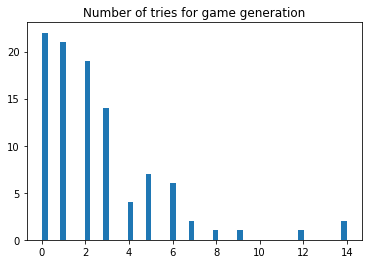

In [5]:
plt.hist([game.sample_tries for game in games], bins=50, rwidth=.9)
plt.title("Number of tries for game generation")
plt.show()

In [ ]:
# sample_tries = pd.Series([game.sample_tries for game in games]).value_counts()
# sample_tries = np.array([sample_tries.get(i, 0) for i in range(100)])
# p = (1 - sample_tries / np.roll(np.where(sample_tries != 0, sample_tries, np.nan), 1))[1:]
# plt.scatter(x=p, y=np.zeros_like(p))
# plt.show()

In [6]:
difficulty_info["max_occurences"] = difficulty_info["game"].apply(lambda game: pd.Series(sum(sum(game.solutions, []), [])).value_counts().max())
difficulty_info["max_occurences"].describe()

count    100.000000
mean       2.270000
std        0.446196
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: max_occurences, dtype: float64

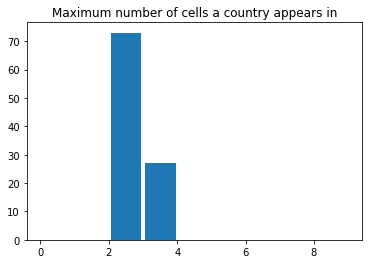

In [7]:
plt.hist(difficulty_info["max_occurences"], bins=range(10), rwidth=.9)
plt.title("Maximum number of cells a country appears in")
plt.show()

In [9]:
difficulty_info

,game,rows,cols,cell_indices,cell_difficulties,max_cell_difficulty,avg_cell_difficulty,num_unique,difficulty,difficulty_order,level,max_occurences
0,<game.Game object at 0x000002D151D226D0>,"[(continent, AS), (landlocked, True), (island,...","[(starting_letter, N), (elevation_sub1k, True)...","[81, 140, 100, 706, 1822, 1292, 707, 1827, 1293]","[4.029176367178279, 3.511109865394066, 3.59270...",5.849057,4.513776,2,4.912001,69,hard,2
1,<game.Game object at 0x000002D151D22760>,"[(flag_colors, Green), (landlocked, True), (el...","[(top_20_population, True), (capital_starting_...","[1773, 1423, 1664, 1817, 1427, 1669, 1829, 142...","[2.077005190507533, 4.724712023273511, 5.09330...",6.430143,4.303236,4,5.981303,58,medium,2
2,<game.Game object at 0x000002D151E7B880>,"[(continent, AF), (ending_letter, A), (startin...","[(bottom_20_population, True), (landlocked, Tr...","[67, 64, 69, 946, 943, 948, 740, 737, 742]","[6.608478640483557, 4.065393941010754, 6.55222...",7.293404,6.124334,5,10.000000,98,hard,3
3,<game.Game object at 0x000002D151E7B8E0>,"[(continent, AF), (flag_colors, Yellow/Gold), ...","[(elevation_sub1k, True), (top_20_area, True),...","[71, 68, 60, 1816, 1813, 1781, 212, 209, 201]","[4.43843060063182, 3.2986602767422815, 4.67649...",4.676499,3.583035,2,2.737274,24,easy,2
4,<game.Game object at 0x000002D151E7BCD0>,"[(top_20_area, True), (continent, SA), (starti...","[(landlocked, True), (capital_starting_letter,...","[1819, 1394, 1828, 345, 332, 346, 903, 894, 904]","[4.236357224311389, 3.231735271122097, 1.63800...",5.683586,3.819371,4,4.775593,34,medium,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,<game.Game object at 0x000002D151D7C190>,"[(continent, AF), (continent, OC), (capital_st...","[(island, True), (top_20_area, True), (ending_...","[65, 68, 20, 307, 309, 282, 1533, 1535, 1087]","[4.744170303945782, 3.2986602767422815, 3.1718...",5.309724,3.762666,3,3.928706,33,medium,2
96,<game.Game object at 0x000002D151D7C2B0>,"[(capital_starting_letter, R), (island, True),...","[(top_20_area, True), (flag_colors, Yellow/Gol...","[1468, 1465, 1469, 1825, 1810, 1827, 347, 344,...","[3.7455171454115477, 6.289305431602719, 5.6079...",6.289305,4.111316,4,5.588243,47,medium,2
97,<game.Game object at 0x000002D151D7C6D0>,"[(top_20_population, True), (starting_letter, ...","[(capital_starting_letter, A), (flag_colors, Y...","[1230, 1811, 1829, 869, 884, 889, 577, 599, 604]","[3.4395175960901674, 1.8885696602365185, 2.182...",4.127785,3.109774,3,2.206044,5,medium,3
98,<game.Game object at 0x000002D151D7C460>,"[(flag_colors, Orange), (island, True), (start...","[(continent, EU), (flag_colors, Blue), (top_20...","[201, 1755, 1784, 206, 1760, 1823, 145, 494, 499]","[3.5545361812744733, 3.527319149330253, 3.0174...",3.554536,2.922678,3,1.583738,2,medium,3


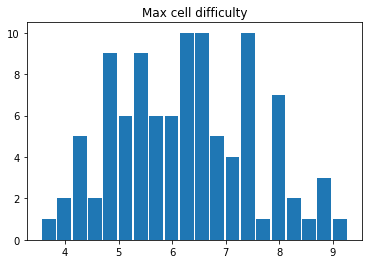

In [11]:
plt.hist(difficulty_info["max_cell_difficulty"], bins=20, rwidth=.9)
plt.title("Max cell difficulty")
plt.show()

In [10]:
for game in difficulty_info.nlargest(20, "max_cell_difficulty")["game"]:
    print(game.data)
    display(game.to_dataframe(solution=True))

{'max_cell_difficulty': 9.2736904155993, 'avg_cell_difficulty': 4.071968865898766, 'difficulty_level': 'medium'}


,Landlocked,Ending letter: U,Top 20 Population
Flag color: Red,"AD,AF,AM,AT,AZ,BF,BI,BO,BY,CF,CH,CZ,ET,HU,KG,L...","GW,MD,PE,TV,VU","BD,CD,CN,DE,EG,ET,FR,ID,IR,JP,MX,PH,RU,TH,US,VN"
Top 20 Area,"KZ,MN,TD",PE,"BR,CD,CN,ID,IN,IR,MX,RU,US"
Capital ending letter: N,"AM,AT,CH,PY,(KZ)",NR,"DE,IR,US"


{'max_cell_difficulty': 8.973999740207638, 'avg_cell_difficulty': 5.6174675172900495, 'difficulty_level': 'hard'}


,Bottom 20 Population,Bottom 20 Area,Top 20 Area
Ending letter: U,"NR,PW,TV,VU","NR,PW,TV",PE
Europe,"AD,LI,MC,SM","AD,LI,MC,MT,SM",RU
Flag color: Green,"DM,GD,KN,SC,VC,VU,(SM)","GD,KN,MV,SC,VC,(SM)","BR,DZ,IN,IR,LY,MX,SA,SD"


{'max_cell_difficulty': 8.896542408576686, 'avg_cell_difficulty': 4.574427584485469, 'difficulty_level': 'hard'}


,N. America,Capital ending letter: I,Europe
Capital starting letter: K,"JM,VC",RW,"DK,UA"
No mountains over 1000m,"AG,BB,BS,GD,LC,TT",TV,"BE,BY,DK,EE,LT,LU,LV,MC,MD,MT,NL,SM"
Top 20 Population,"MX,US","IN,VN","DE,FR,RU"


{'max_cell_difficulty': 8.722519369622631, 'avg_cell_difficulty': 5.470410274462993, 'difficulty_level': 'hard'}


,Flag color: Orange,Ending letter: U,Flag color: Black
Bottom 20 Population,MH,"NR,PW,TV,VU","AG,BB,DM,KN,LC,VU"
Mountain over 5000m,"BT,IN",PE,"AF,KE,TZ,UG,(EC)"
Top 20 Area,IN,PE,"LY,SD"


{'max_cell_difficulty': 8.45075798487572, 'avg_cell_difficulty': 4.6775378374853895, 'difficulty_level': 'hard'}


,Bottom 20 Area,Asia,Top 20 Population
Capital starting letter: K,VC,"AF,KW,MY,NP,(EG)","CD,EG"
Capital ending letter: D,PW,"IQ,PK,SA",PK
Island Nation,"AG,BB,BH,GD,KN,LC,MH,MT,MV,NR,PW,SC,SG,TO,TV,VC","BH,BN,ID,JP,LK,MV,PH,SG,TW","ID,JP,PH"


{'max_cell_difficulty': 8.2066824247456, 'avg_cell_difficulty': 4.417192488822443, 'difficulty_level': 'hard'}


,Bottom 20 Area,Flag color: Red,Top 20 Area
Starting letter: L,LI,"LA,LB,LI,LR,LT,LU,LV,LY",LY
Flag color: Orange,MH,"AM,LK,ZM",IN
Island Nation,"AG,BB,BH,GD,KN,LC,MH,MT,MV,NR,PW,SC,SG,TO,TV,VC","AG,BH,BN,CU,DM,DO,FJ,GB,GD,HT,ID,IS,JP,KI,KM,K...","ID,(AU)"


{'max_cell_difficulty': 8.2066824247456, 'avg_cell_difficulty': 3.855291304730124, 'difficulty_level': 'medium'}


,Top 20 Population,Bottom 20 Area,Europe
Flag color: Orange,IN,MH,"IE,(AM)"
Island Nation,"ID,JP,PH","AG,BB,BH,GD,KN,LC,MH,MT,MV,NR,PW,SC,SG,TO,TV,VC","CY,GB,IE,IS,MT"
Flag color: Blue,"BR,CD,ET,FR,IN,PH,RU,TH,US","AD,AG,BB,LC,LI,MH,NR,PW,SC,SM,TV,VC","AD,BA,CZ,EE,FI,FR,GB,GR,HR,IS,LI,LU,MD,NL,NO,R..."


{'max_cell_difficulty': 8.102083876854222, 'avg_cell_difficulty': 6.011940068339993, 'difficulty_level': 'hard'}


,Capital ending letter: S,Landlocked,Oceania
Bottom 20 Population,"AG,GD,LC","AD,LI,SM","KI,MH,NR,PW,TO,TV,VU,WS"
No mountains over 1000m,"AG,GD,LC,LT,MU","BF,BY,LU,MD,PY,SM","KI,MH,NR,PW,TV"
Top 20 Area,"AR,LY","KZ,MN,TD",AU


{'max_cell_difficulty': 8.036286090249991, 'avg_cell_difficulty': 4.551646056609217, 'difficulty_level': 'hard'}


,Flag color: Black,Europe,Oceania
Top 20 Area,"LY,SD",RU,AU
Flag color: Green,"AE,AF,DM,GH,GW,GY,IQ,JM,JO,KE,KN,KW,LS,LY,MW,M...","BG,BY,CY,HU,IE,IT,LT,PT,(AZ,ME,SM)","SB,VU"
Bottom 20 Area,"AG,BB,KN,LC","AD,LI,MC,MT,SM","MH,NR,PW,TO,TV"


{'max_cell_difficulty': 8.036286090249991, 'avg_cell_difficulty': 6.168933122445775, 'difficulty_level': 'hard'}


,Landlocked,Capital starting letter: C,Oceania
Bottom 20 Population,"AD,LI,SM",LC,"KI,MH,NR,PW,TO,TV,VU,WS"
Top 20 Area,"KZ,MN,TD",AU,AU
Bottom 20 Area,"AD,LI,SM",LC,"MH,NR,PW,TO,TV"


{'max_cell_difficulty': 7.907950366106118, 'avg_cell_difficulty': 4.145453977573009, 'difficulty_level': 'medium'}


,Flag color: Blue,Top 20 Area,Ending letter: U
Island Nation,"AG,BB,BS,CU,DO,FJ,GB,HT,IS,KI,KM,LC,MH,MU,NR,N...","ID,(AU)","NR,PW,TV,VU"
Mountain over 5000m,"AR,CD,CL,CO,EC,IN,KZ,NP,RU,TZ,US","AR,CA,CD,CN,IN,IR,KZ,MX,PE,RU,US",PE
Capital starting letter: P,"CZ,FR,HT,KH,KP,MU,PA,XK,ZA,(ME,MY)",CN,VU


{'max_cell_difficulty': 7.898627972698059, 'avg_cell_difficulty': 5.131407045998311, 'difficulty_level': 'hard'}


,Bottom 20 Area,Mountain over 5000m,Ending letter: R
Starting letter: N,NR,NP,NE
Landlocked,"AD,LI,SM","AF,BO,BT,KG,KZ,NP,TJ,UG",NE
Asia,"BH,MV,SG","AF,BT,CN,GE,IN,IR,KG,KZ,MM,NP,PK,TJ,(RU)","MM,QA,SG"


{'max_cell_difficulty': 7.896294345111627, 'avg_cell_difficulty': 5.723502647748405, 'difficulty_level': 'hard'}


,No mountains over 1000m,Landlocked,Starting letter: E
S. America,"PY,UY,(TT)","BO,PY",EC
Ending letter: I,KI,"BI,ML,MN,MW,SK,SZ",SZ
Flag color: Orange,MH,"AM,BT,NE,ZM",CI


{'max_cell_difficulty': 7.896294345111627, 'avg_cell_difficulty': 4.796656840965292, 'difficulty_level': 'hard'}


,No mountains over 1000m,Flag color: Green,Capital starting letter: L
Island Nation,"AG,BB,BH,BS,GD,KI,LC,MH,MT,MU,MV,NR,PW,SC,SG,T...","CY,DM,GD,IE,JM,KM,KN,LK,MG,MU,MV,SB,SC,VC,VU,(HT)",GB
Ending letter: I,KI,"BI,DJ,ML,MW,(HT)","MW,(SZ)"
S. America,"PY,UY,(TT)","BO,BR,GY,SR,(PY)","BO,PE"


{'max_cell_difficulty': 7.6438241895961285, 'avg_cell_difficulty': 3.741320161434629, 'difficulty_level': 'medium'}


,Starting letter: I,Ending letter: U,Top 20 Population
Europe,"IE,IS,IT",MD,"DE,FR,RU"
Island Nation,"ID,IE,IS","NR,PW,TV,VU","ID,JP,PH"
Mountain over 5000m,"IN,IR",PE,"CD,CN,IN,IR,MX,PK,RU,US"


{'max_cell_difficulty': 7.542013600889298, 'avg_cell_difficulty': 5.643962594316401, 'difficulty_level': 'hard'}


,N. America,Bottom 20 Population,Capital starting letter: B
Starting letter: D,"DM,DO",DM,DE
Ending letter: O,"MX,TT","MC,SM",CG
No mountains over 1000m,"AG,BB,BS,GD,LC,TT","AG,BB,GD,KI,LC,MC,MH,NR,PW,SC,SM,TV","BB,BE,GM,GW"


{'max_cell_difficulty': 7.542013600889298, 'avg_cell_difficulty': 5.002748410663794, 'difficulty_level': 'hard'}


,Africa,Starting letter: D,Landlocked
Bottom 20 Population,SC,DM,"AD,LI,SM"
Top 20 Area,"CD,DZ,LY,SD,TD",CD,"KZ,MN,TD"
Flag color: Green,"BF,BI,BJ,CF,CG,CI,CM,DJ,DZ,ER,ET,GA,GH,GM,GN,G...","DJ,DM","AF,AZ,BF,BI,BO,BY,CF,ET,HU,LS,ML,MW,NE,RW,SS,T..."


{'max_cell_difficulty': 7.501932366034666, 'avg_cell_difficulty': 5.071312702768298, 'difficulty_level': 'hard'}


,Capital starting letter: L,Ending letter: D,No mountains over 1000m
Flag color: Orange,ZM,IE,MH
Island Nation,GB,"IE,IS,NZ","AG,BB,BH,BS,GD,KI,LC,MH,MT,MU,MV,NR,PW,SC,SG,T..."
Landlocked,"BO,LU,MW,ZM,(SZ)","TD,(BY)","BF,BY,LU,MD,PY,SM"


{'max_cell_difficulty': 7.402545949413093, 'avg_cell_difficulty': 4.641125126618231, 'difficulty_level': 'hard'}


,Top 20 Area,No mountains over 1000m,Flag color: Green
Landlocked,"KZ,MN,TD","BF,BY,LU,MD,PY,SM","AF,AZ,BF,BI,BO,BY,CF,ET,HU,LS,ML,MW,NE,RW,SS,T..."
Oceania,AU,"KI,MH,NR,PW,TV","SB,VU"
Island Nation,"ID,(AU)","AG,BB,BH,BS,GD,KI,LC,MH,MT,MU,MV,NR,PW,SC,SG,T...","CY,DM,GD,IE,JM,KM,KN,LK,MG,MU,MV,SB,SC,VC,VU,(HT)"


{'max_cell_difficulty': 7.395840941916767, 'avg_cell_difficulty': 5.9825724102433275, 'difficulty_level': 'hard'}


,Bottom 20 Area,Ending letter: O,Landlocked
Bottom 20 Population,"AD,AG,BB,GD,KN,LC,LI,MC,MH,NR,PW,SC,SM,TO,TV,VC","MC,SM","AD,LI,SM"
Capital starting letter: B,"BB,KN",CG,"AZ,CF,CH,HU,KG,ML,RS,SK,(BI)"
Africa,SC,"BF,CD,CG,LS,MA,TG","BF,BI,BW,CF,ET,LS,ML,MW,NE,RW,SS,SZ,TD,UG,ZM,ZW"


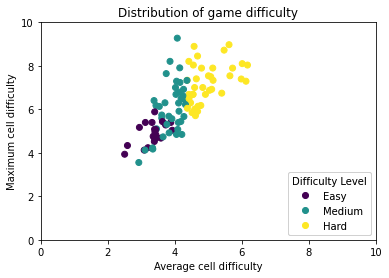

medium    40
hard      39
easy      21
Name: level, dtype: int64


In [14]:
scatter = plt.scatter(x=difficulty_info["avg_cell_difficulty"], y=difficulty_info["max_cell_difficulty"], c=difficulty_info["level"])
plt.xlabel("Average cell difficulty")
plt.ylabel("Maximum cell difficulty")
plt.title("Distribution of game difficulty")
plt.xlim([0,10])
plt.ylim([0,10])
ax = plt.gca()
legend = ax.legend(scatter.legend_elements()[0], ["Easy", "Medium", "Hard"], loc="lower right", title="Difficulty Level")
ax.add_artist(legend)
plt.show()

print(difficulty_info["level"].value_counts())

In [21]:
cell_info = estimator.cell_info
cell_info.nsmallest(20, "difficulty")

,row_cat,row_val,col_cat,col_val,contents,alt_contents,size,row_difficulty,col_difficulty,row_col_difficulty,solution_difficulty,difficulty
1790,flag_colors,White,flag_colors,Red,"[AE, AF, AG, AT, AU, AZ, BG, BH, BI, BN, BY, B...","[PT, UG, UZ, VE]",104,0.300218,0.000000,0.000000,0.000000,0.000000
1756,flag_colors,Red,flag_colors,Blue,"[AD, AG, AM, AU, AZ, BZ, CD, CF, CL, CO, CR, C...","[ME, PT, UZ]",64,0.000000,1.650775,0.739143,0.646613,0.703377
1757,flag_colors,White,flag_colors,Blue,"[AG, AR, AU, AZ, BA, BR, BW, BZ, CF, CL, CR, C...","[PT, VE]",73,0.300218,1.650775,0.903449,0.524250,0.724667
131,flag_colors,Red,continent,AS,"[AE, AF, AM, AZ, BD, BH, BN, CN, GE, ID, IQ, I...","[EG, RU, UZ]",39,0.000000,1.393250,0.598203,0.859845,0.740071
1794,top_20_population,True,flag_colors,Red,"[BD, CD, CN, DE, EG, ET, FR, ID, IR, JP, MX, P...",[],16,2.241273,0.000000,1.062316,0.722754,0.906060
132,flag_colors,White,continent,AS,"[AE, AF, AZ, BH, BN, BT, GE, ID, IL, IN, IQ, I...","[EG, RU]",38,0.300218,1.393250,0.762509,1.211368,1.001894
1803,top_20_population,True,flag_colors,White,"[BR, EG, FR, ID, IN, IR, JP, MX, NG, PH, PK, R...",[],14,2.241273,0.300218,1.226621,0.758038,1.007367
202,flag_colors,Red,continent,EU,"[AD, AL, AT, BE, BG, BY, CH, CZ, DE, DK, ES, F...","[AM, AZ, GE]",36,0.000000,1.335214,0.566440,1.428321,1.012494
1796,top_20_area,True,flag_colors,Red,"[AU, CA, CD, CN, DZ, ID, IR, LY, MN, MX, PE, R...",[],15,2.483127,0.000000,1.194679,0.818073,1.021626
1791,flag_colors,Yellow/Gold,flag_colors,Red,"[AD, AG, AO, BE, BF, BJ, BN, BO, CD, CF, CG, C...","[FI, PT, PY, RS, SI, TM]",63,2.599234,0.000000,1.258223,0.848860,1.069506


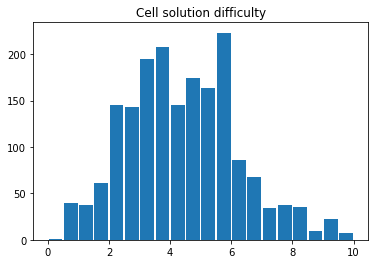

In [23]:
plt.hist(cell_info["solution_difficulty"], bins=20, rwidth=.9)
plt.title("Cell solution difficulty")
plt.show()

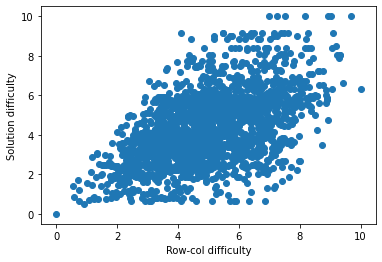

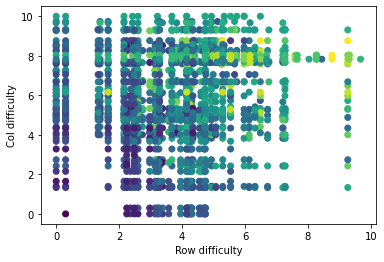

In [26]:
plt.scatter(x=cell_info["row_col_difficulty"], y=cell_info["solution_difficulty"])
plt.xlabel("Row-col difficulty")
plt.ylabel("Solution difficulty")
plt.show()

plt.scatter(x=cell_info["row_difficulty"], y=cell_info["col_difficulty"], c=cell_info["solution_difficulty"])
plt.xlabel("Row difficulty")
plt.ylabel("Col difficulty")
plt.show()
# plt.scatter(x=cell_info["row_col_difficulty"], y=cell_info["row_col_difficulty_harmonic"])
# plt.show()

In [31]:
# difficulty_info.nlargest(10, "difficulty")

In [ ]:


# plt.scatter(x=np.log(df["gdp"]) - np.log(df["population"]), y=df["gdp_per_capita"])
# plt.scatter(x=np.log(df["population"]), y=np.log(df["gdp"]), c=df["difficulty"])
# plt.scatter(x=np.log(df["population"]), y=np.log(df["gdp"]), c=df["difficulty"])
# plt.show()